# Imports

In [1]:
import requests
import base64
import pandas as pd
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

In [2]:
wp_user = "rafael"
wp_password = open('python_api_password.txt').read()

In [3]:
wp_credentials = wp_user + ":" + wp_password
wp_token = base64.b64encode(wp_credentials.encode())
wp_header = {'Authorization': 'Basic ' + wp_token.decode('utf-8')}

# Posts

In [6]:
api_url = 'https://asimov.academy/wp-json/wp/v2/posts'
response = requests.get(api_url)
response.json()

[{'id': 40339,
  'date': '2023-01-30T10:38:46',
  'date_gmt': '2023-01-30T13:38:46',
  'guid': {'rendered': 'https://asimov.academy/?p=40339'},
  'modified': '2023-01-30T10:38:48',
  'modified_gmt': '2023-01-30T13:38:48',
  'slug': 'visualizacao-de-dados-financeiros-pt1',
  'status': 'publish',
  'type': 'post',
  'link': 'https://asimov.academy/visualizacao-de-dados-financeiros-pt1/',
  'title': {'rendered': 'Visualização de dados financeiros para Trading Quantitativo &#8211; parte 1'},
  'content': {'rendered': '\n<p>Dados financeiros confiáveis e em grande quantidade são o principal ativo de um trader quantitativo. Sem eles, o processo de desenvolvimento de estratégias se torna impossível.\xa0</p>\n\n\n\n<p>Em um minuto de mercado, é gerado um volume de informações maior do que seríamos capazes de analisar em anos. Portanto, tão importante quanto possuir bons <em>datasets </em>(conjuntos de dados)<em> </em>é saber o ângulo certo para analisá-los.</p>\n\n\n\n<p>Neste artigo, faremos 

In [7]:
api_url = 'https://asimov.academy/wp-json/wp/v2/posts?page=1&per_page=100'
response = requests.get(api_url)
pages_count = response.headers['X-WP-TotalPages']

# Old

In [9]:
api_url = 'https://asimov.academy/wp-json/wp/v2/comments?page=1&per_page=100'
response = requests.get(api_url)
pages_count = response.headers['X-WP-TotalPages']
response_json = response.json()

In [11]:
response_json

[{'id': 42111,
  'post': 1970,
  'parent': 0,
  'author': 3332,
  'author_name': 'Gilberto Conceição dos Santos',
  'author_url': '',
  'date': '2023-01-30T10:01:08',
  'date_gmt': '2023-01-30T13:01:08',
  'content': {'rendered': '<p>A resolução do video está muito ruim, não tem opção para melhorar como estava nos anteriores.</p>\n'},
  'link': 'https://asimov.academy/courses/analisando-dados-com-pandas/licoes/4-projeto-2-analise-de-dados-de-obesidade-mundial/topico/2-2-funcoes-adicionais/#comment-42111',
  'status': 'approved',
  'type': 'comment',
  'author_avatar_urls': {'24': 'https://asimov.academy/wp-content/uploads/avatars/3332/63888bcbd6c28-bpthumb.jpg',
   '48': 'https://asimov.academy/wp-content/uploads/avatars/3332/63888bcbd6c28-bpthumb.jpg',
   '96': 'https://asimov.academy/wp-content/uploads/avatars/3332/63888bcbd6c28-bpthumb.jpg'},
  'meta': [],
  '_links': {'self': [{'href': 'https://asimov.academy/wp-json/wp/v2/comments/42111'}],
   'collection': [{'href': 'https://asim

In [12]:
df_comments = pd.DataFrame(response_json).set_index("date")
df_comments.index = pd.to_datetime(df_comments.index)

In [13]:
df_comments

,id,post,parent,author,author_name,author_url,date_gmt,content,link,status,type,author_avatar_urls,meta,_links
date,,,,,,,,,,,,,,
2023-01-30 10:01:08,42111,1970,0,3332,Gilberto Conceição dos Santos,,2023-01-30T13:01:08,{'rendered': '<p>A resolução do video está mui...,https://asimov.academy/courses/analisando-dado...,approved,comment,{'24': 'https://asimov.academy/wp-content/uplo...,[],{'self': [{'href': 'https://asimov.academy/wp-...
2023-01-30 09:55:01,42110,6144,40749,694,Mateus Kienzle,,2023-01-30T12:55:01,"{'rendered': '<p>Oi, Helio!</p> <p>Os Sets() t...",https://asimov.academy/courses/python-starter/...,approved,comment,{'24': 'https://asimov.academy/wp-content/uplo...,[],{'self': [{'href': 'https://asimov.academy/wp-...
2023-01-30 09:49:54,42109,12290,40919,694,Mateus Kienzle,,2023-01-30T12:49:54,"{'rendered': '<p>Boa, Jean! Que bom que conseg...",https://asimov.academy/courses/python-starter/...,approved,comment,{'24': 'https://asimov.academy/wp-content/uplo...,[],{'self': [{'href': 'https://asimov.academy/wp-...
2023-01-30 09:47:39,42108,8793,40725,694,Mateus Kienzle,,2023-01-30T12:47:39,"{'rendered': '<p>Oi, Wagner!</p> <p>Os callbac...",https://asimov.academy/courses/dashboards-inte...,approved,comment,{'24': 'https://asimov.academy/wp-content/uplo...,[],{'self': [{'href': 'https://asimov.academy/wp-...
2023-01-30 09:46:13,42107,13327,40702,694,Mateus Kienzle,,2023-01-30T12:46:13,"{'rendered': '<p>Oi, Cleber!</p> <p>No botão &...",https://asimov.academy/courses/dashboards-inte...,approved,comment,{'24': 'https://asimov.academy/wp-content/uplo...,[],{'self': [{'href': 'https://asimov.academy/wp-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-24 10:30:56,40671,13456,15538,409,leonarddocchagas,,2023-01-24T13:30:56,"{'rendered': '<p>Olá, bom dia. Alguma previsão...",https://asimov.academy/courses/dashboards-inte...,approved,comment,{'24': 'https://asimov.academy/wp-content/plug...,[],{'self': [{'href': 'https://asimov.academy/wp-...
2023-01-24 08:15:11,40602,8782,0,2832,Wagner Brito,,2023-01-24T11:15:11,"{'rendered': '<p>Opa, curti demais. Mas agora ...",https://asimov.academy/courses/dashboards-inte...,approved,comment,{'24': 'https://asimov.academy/wp-content/uplo...,[],{'self': [{'href': 'https://asimov.academy/wp-...
2023-01-24 07:56:58,40601,2177,0,2231,Willian Gomes,,2023-01-24T10:56:58,"{'rendered': '<p>Rodrigo, estou trabalhando um...",https://asimov.academy/courses/visualizando-da...,approved,comment,{'24': 'https://asimov.academy/wp-content/uplo...,[],{'self': [{'href': 'https://asimov.academy/wp-...


In [40]:
response_json[0].keys()

dict_keys(['id', 'post', 'parent', 'author', 'author_name', 'author_url', 'date', 'date_gmt', 'content', 'link', 'status', 'type', 'author_avatar_urls', 'meta', '_links'])

In [44]:
for resp in response_json:
    if 'Mateus' in resp["author_name"]:
        break

In [48]:
response_json

[{'id': 41744,
  'post': 6803,
  'parent': 0,
  'author': 5012,
  'author_name': 'Eduardo Habas',
  'author_url': '',
  'date': '2023-01-28T14:27:39',
  'date_gmt': '2023-01-28T17:27:39',
  'content': {'rendered': '<p>Excelente aula! </p>\n<p>To digerindo ela aos poucos hahaha. </p>\n<p>Pra quem quiser plotar sem usar o terminal interativo é só usar essa sequência de comando: </p>\n<p><span>import</span> seaborn <span>as</span> sns<br />\n<span>import</span> matplotlib.pyplot <span>as</span> plt<br />\nsns.<span>displot</span>(list_chaos)</p>\n<p>plt.<span>show</span>()</p>\n<p>Abraços.</p>\n'},
  'link': 'https://asimov.academy/courses/python-starter/licoes/7-programacao-orientada-a-objetos/topico/7-projeto-simulador-de-caos-parte-3/#comment-41744',
  'status': 'approved',
  'type': 'comment',
  'author_avatar_urls': {'24': 'https://asimov.academy/wp-content/uploads/avatars/5012/63d018734fc91-bpthumb.png',
   '48': 'https://asimov.academy/wp-content/uploads/avatars/5012/63d018734fc91-

In [45]:
resp

{'id': 40969,
 'post': 2177,
 'parent': 40601,
 'author': 694,
 'author_name': 'Mateus Kienzle',
 'author_url': '',
 'date': '2023-01-25T12:39:54',
 'date_gmt': '2023-01-25T15:39:54',
 'content': {'rendered': '<p>Oi, Willian! Tudo bom?</p>\n<p>Você verificou em quais campos específicos os valores nulos surgiram? Não surgiram em campos que, antes do pivot table, não existiam e após você utilizar o comando pra pivotar a tabela eles surgiram?</p>\n'},
 'link': 'https://asimov.academy/courses/visualizando-dados-com-matplotlib/licoes/criando-graficos-estatisticos-com-seaborn/topico/2-5-plots-matriciais/#comment-40969',
 'status': 'approved',
 'type': 'comment',
 'author_avatar_urls': {'24': 'https://asimov.academy/wp-content/uploads/avatars/694/62a9d3b4f37c3-bpthumb.jpg',
  '48': 'https://asimov.academy/wp-content/uploads/avatars/694/62a9d3b4f37c3-bpthumb.jpg',
  '96': 'https://asimov.academy/wp-content/uploads/avatars/694/62a9d3b4f37c3-bpthumb.jpg'},
 'meta': [],
 '_links': {'self': [{'hre

In [37]:
pages_count

'25'

In [28]:
(response.json()[5]).keys()

dict_keys(['id', 'date', 'date_gmt', 'guid', 'modified', 'modified_gmt', 'slug', 'status', 'type', 'link', 'title', 'content', 'excerpt', 'author', 'featured_media', 'comment_status', 'ping_status', 'sticky', 'template', 'format', 'meta', 'categories', 'tags', 'yoast_head', '_links'])

In [30]:
response.json()[5]["comment_status"]

'open'

In [9]:
posts = read_wordpress_posts()

In [11]:
len(posts)

10

# Comentários

## Recentes

In [4]:
api_url = 'https://asimov.academy/wp-json/wp/v2/comments?page=1&per_page=100'
response = requests.get(api_url)
pages_count = response.headers['X-WP-TotalPages']
response_json = response.json()

In [71]:
df_comments = pd.DataFrame(response_json).set_index("date")
df_comments.index = pd.to_datetime(df_comments.index)

In [56]:
df_comments['groups'] = [df_comments['link'][x].split('/') for x in range(len(df_comments))]

In [ ]:
df_comments['course'] = ''
df_comments['lesson'] = ''
df_comments['topic'] = ''
for i in range(len(df_comments)):
    df_comments['course'][i] = df_comments['groups'][i][4]
    df_comments['lesson'][i] = df_comments['groups'][i][6]
    try:
        df_comments['topic'][i] = df_comments['groups'][i][8]
    except:
        df_comments['topic'][i] = ''

In [ ]:
df_comments['course'].value_counts()

In [ ]:
df_comments[df_comments['parent']==0]['link'][0]

## Comentários Full

In [4]:
api_url = 'https://asimov.academy/wp-json/wp/v2/comments?page=1&per_page=100'
response = requests.get(api_url)
pages_count = response.headers['X-WP-TotalPages']
response_json = response.json()

In [5]:
df_comments_full = pd.DataFrame()
for i in range(int(pages_count)):
    api_url = 'https://asimov.academy/wp-json/wp/v2/comments?page='+str((i+1))+'&per_page=100'
    response = requests.get(api_url)
    response_json = response.json()
    df_comments = pd.DataFrame(response_json).set_index("date")
    df_comments.index = pd.to_datetime(df_comments.index)
    df_comments_full = df_comments_full.append(df_comments)

In [6]:
df_comments_full['groups'] = [df_comments_full['link'][x].split('/') for x in range(len(df_comments_full))]

In [7]:
df_comments_full['course'] = ''
df_comments_full['lesson'] = ''
df_comments_full['topic'] = ''
for i in range(len(df_comments_full)):
    df_comments_full['course'][i] = df_comments_full['groups'][i][4]
    try:
        df_comments_full['lesson'][i] = df_comments_full['groups'][i][6]
    except:
        df_comments_full['lesson'][i] = ''
    try:
        df_comments_full['topic'][i] = df_comments_full['groups'][i][8]
    except:
        df_comments_full['topic'][i] = ''

In [8]:
dsml = ['machine-learning-ai-com-python', 'projetos-de-data-science']
quant = ['trading-quantitativo']
dip = ['dashboards-interativos-com-python', 'mybudget-acesso-livre']
aut = ['automatizando-tarefas-com-python', 'web-scraping-extraindo-dados-da-web', '5-6-callbacks', '4-5-o-metodo-update_layout', '5-5-decorators']

df_comments_full['trail'] = ''
for i in range(len(df_comments_full)):
    if df_comments_full['course'][i] in dsml:
        df_comments_full['trail'][i] = 'DSML'
    elif df_comments_full['course'][i] in quant:
        df_comments_full['trail'][i] = 'QUANT'
    elif df_comments_full['course'][i] in dip:
        df_comments_full['trail'][i] = 'DIP'
    elif df_comments_full['course'][i] in aut:
        df_comments_full['trail'][i] = 'AUT'
    else:
        df_comments_full['trail'][i] = 'Python Starter'

In [9]:
df_comments_full[df_comments_full['parent'] == 0]['trail'].value_counts()

Python Starter    1001
DIP                406
AUT                 86
QUANT               62
DSML                41
Name: trail, dtype: int64

In [10]:
df_comments_full[df_comments_full['parent']!=0].author_name.value_counts()

Mateus Kienzle                         734
Rodrigo Vanzelotti                     362
Rodrigo Soares Tadewald                267
Rafael Danoski                         139
Adriano Soares                          81
                                      ... 
José Wilkens da Costa Pereira Filho      1
Matheus Albuquerque Fontes               1
Pedro Maia                               1
Daniel Bragion                           1
diogopqdt Ferreira Expedito              1
Name: author_name, Length: 280, dtype: int64

In [11]:
df_comments_full['year'] = df_comments_full.index.year
df_comments_full_year = df_comments_full[df_comments_full['year'] == 2023]
df_comments_full_year[df_comments_full_year['parent']!=0].author_name.value_counts()

Mateus Kienzle             268
Rodrigo Vanzelotti         246
Rafael Danoski             139
Rodrigo Soares Tadewald     87
Adriano Soares              81
                          ... 
JOAQUIM BORGES               1
André Pucciarelli            1
Fabiano Camargo              1
Fernando Veadrigo            1
Andre Montibeller            1
Name: author_name, Length: 141, dtype: int64

## Comentários Semana

In [12]:
df_prod = pd.read_csv('../Robo_suporte/df_prod.csv', sep=';').set_index("date")
df_prod.index = pd.to_datetime(df_prod.index)

In [13]:
d = datetime(2023,2,14)
parent_list = df_prod['parent'].unique()
resp_ids = [1, 694, 695, 2979, 232, 4127]

In [14]:
df_prod[(df_prod.index > d) & (~df_prod['author'].isin(resp_ids)) & (~df_prod['id'].isin(parent_list))]['trail'].value_counts()

Python Starter    5
DIP               4
QUANT             3
AUT               1
Name: trail, dtype: int64

In [15]:
df_prod[(df_prod.index > d) & (~df_prod['author'].isin(resp_ids)) & (~df_prod['id'].isin(parent_list))]['resp'].value_counts()

<@279056011233460224>    4
<@690175403876548673>    4
<@695370056787296410>    2
<@993487560431120464>    1
<@671007727232745501>    1
<@343467764909998082>    1
Name: resp, dtype: int64

In [16]:
df_prod[(df_prod['parent']!=0) & (df_prod.index>d)].author_name.value_counts()

Rafael Danoski                        64
Rodrigo Vanzelotti                    63
Mateus Kienzle                        63
Rodrigo Soares Tadewald               49
Adriano Soares                        35
Juliano Faccioni                      23
Alexandre de Faria Oliveira           10
Estevam Henrique Rizek                 7
guilherme bonvechio                    7
PEDRO ALVES                            5
Thiago Ferreira de Mesquita            5
Rafael Tedesco                         5
Bruno Bernardes de Souza               5
Vinicius Matos                         4
Ricardo Batista de Oliveira            3
Eduardo Alberto Somacal                3
João Corrêa                            2
Luiz de Oliveira                       2
Paulo Altman                           2
Willian Gomes                          2
Gabrihel Beigelman                     2
Edson Ribeiro                          2
Silvano Charão Dias Junior             2
Ihan Messias Nascimento dos Santos     2
Thiago BORGES   

# Análises

In [12]:
resp_ids = [1, 694, 695, 2979, 232, 4127]

In [13]:
df_comments_full['year'] = df_comments_full.index.year
df_comments_full['month'] = df_comments_full.index.month
df_comments_full['day'] = df_comments_full.index.day
df_comments_full['weekday'] = df_comments_full.index.weekday
df_comments_full['hour'] = df_comments_full.index.hour

df_comments_full['yearmonth'] = [(str(df_comments_full['year'][x]) + format(df_comments_full['month'][x], '02d')) for x in range(len(df_comments_full))]
df_comments_full['yearmonthday'] = [(str(df_comments_full['year'][x]) + format(df_comments_full['month'][x], '02d') + format(df_comments_full['day'][x], '02d')) for x in range(len(df_comments_full))]
df_comments_full['cont'] = 1

In [14]:
df_comments_full_answered = df_comments_full[(df_comments_full['parent'] != 0)]
df_comments_full_answered_month = df_comments_full_answered[(df_comments_full_answered['yearmonth'] == '202304')]
df_comments_full_new = df_comments_full[(~df_comments_full['author'].isin(resp_ids))]
df_comments_full_new_month = df_comments_full_new[(df_comments_full_new['yearmonth'] == '202304')]

In [15]:
agg = df_comments_full_new_month.groupby(['day']).agg({'cont':'sum'})

In [16]:
agg_answered = df_comments_full_answered_month.groupby(['day']).agg({'cont':'sum'})

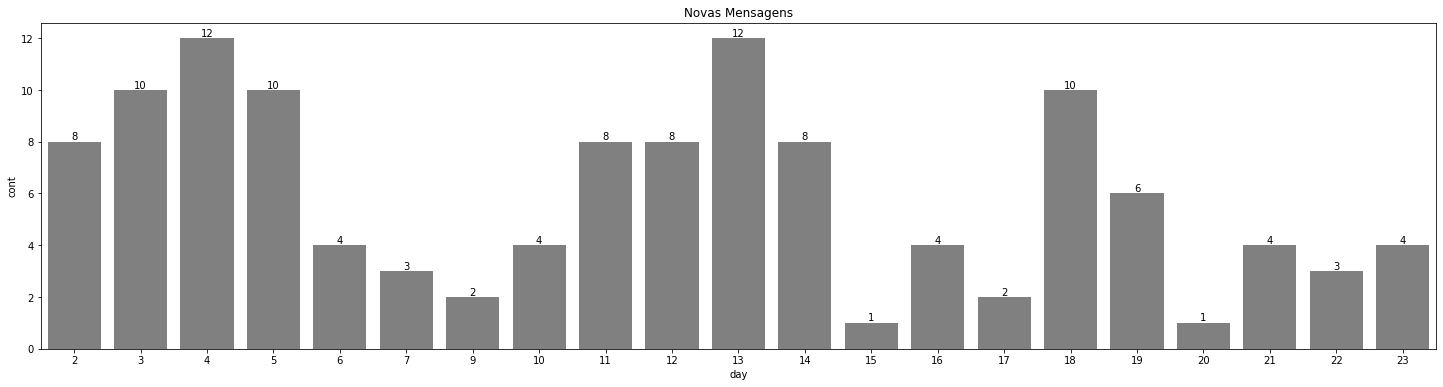

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,6))
plt.title("Novas Mensagens")

ax = sns.barplot(data=agg, x=agg.index, y='cont', color='gray')
#sns.barplot(data=agg_answered, x=agg_answered.index, y='cont')
for i in ax.containers:
    ax.bar_label(i,)
ax=ax

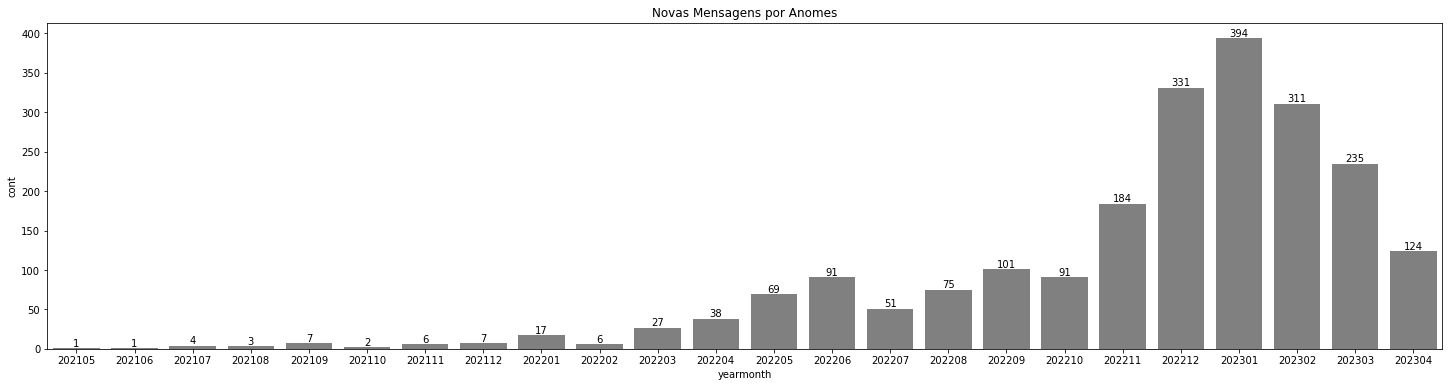

In [18]:
agg = df_comments_full_new.groupby(['yearmonth']).agg({'cont':'sum'})

plt.figure(figsize=(25,6))
plt.title("Novas Mensagens por Anomes")

ax = sns.barplot(data=agg, x=agg.index, y='cont', color='gray')
#sns.barplot(data=agg_answered, x=agg_answered.index, y='cont')
for i in ax.containers:
    ax.bar_label(i,)
ax=ax

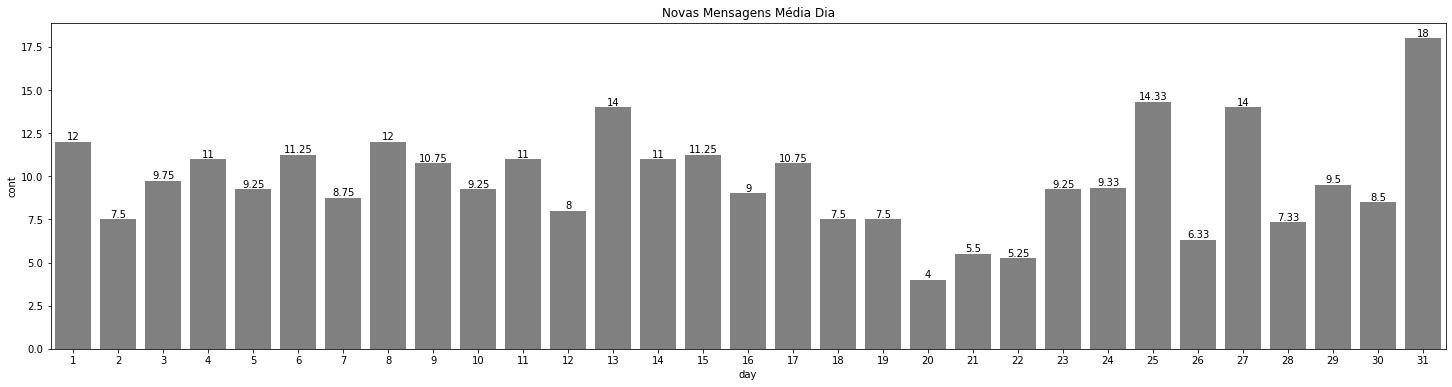

In [19]:
df_comments_full_new = df_comments_full_new[df_comments_full_new['year']>=2023]
agg = df_comments_full_new.groupby(['month','day']).agg({'cont':'sum'})
agg_day = agg.groupby(['day']).agg({'cont':'mean'})
agg_day['cont'] = agg_day['cont'].round(2)

plt.figure(figsize=(25,6))
plt.title("Novas Mensagens Média Dia")

ax = sns.barplot(data=agg_day, x=agg_day.index, y='cont', color='gray')
#sns.barplot(data=agg_answered, x=agg_answered.index, y='cont')
for i in ax.containers:
    ax.bar_label(i,)
ax=ax

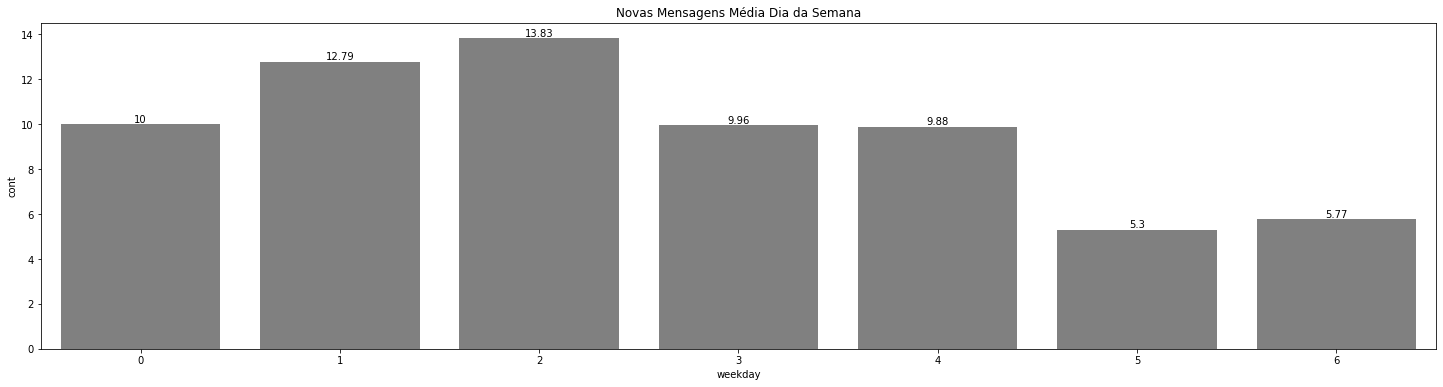

In [20]:
agg = df_comments_full_new.groupby(['month','day','weekday']).agg({'cont':'sum'})
agg_day = agg.groupby(['day', 'weekday']).agg({'cont':'mean'})
agg_weekday = agg_day.groupby(['weekday']).agg({'cont':'mean'})
agg_weekday['cont'] = agg_weekday['cont'].round(2)

plt.figure(figsize=(25,6))
plt.title("Novas Mensagens Média Dia da Semana")

ax = sns.barplot(data=agg_weekday, x=agg_weekday.index, y='cont', color='gray')
#sns.barplot(data=agg_answered, x=agg_answered.index, y='cont')
for i in ax.containers:
    ax.bar_label(i,)
ax=ax

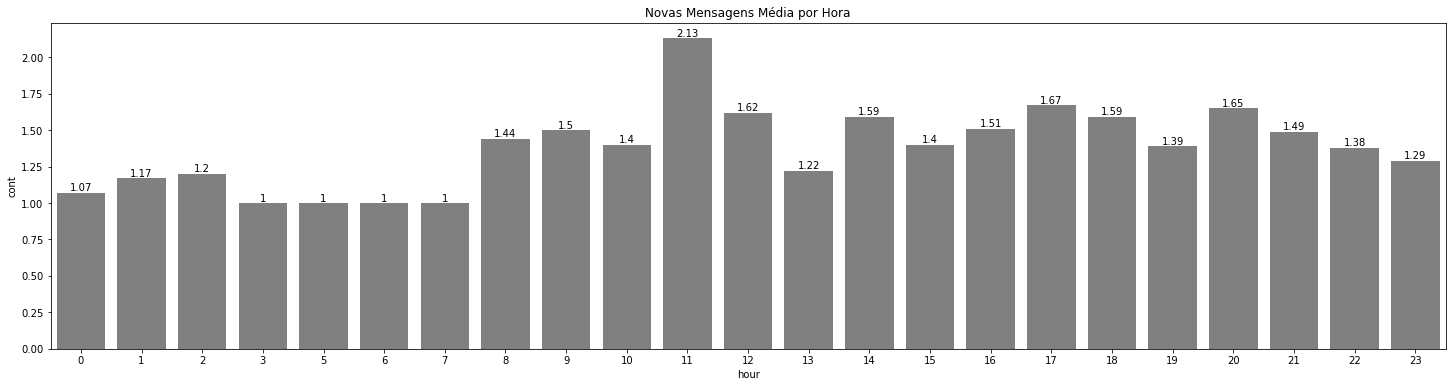

In [21]:
agg = df_comments_full_new.groupby(['month','day','hour']).agg({'cont':'sum'})
agg_day = agg.groupby(['day', 'hour']).agg({'cont':'mean'})
agg_hour = agg_day.groupby(['hour']).agg({'cont':'mean'})
agg_hour['cont'] = agg_hour['cont'].round(2)

plt.figure(figsize=(25,6))
plt.title("Novas Mensagens Média por Hora")

ax = sns.barplot(data=agg_hour, x=agg_hour.index, y='cont', color='gray')
#sns.barplot(data=agg_answered, x=agg_answered.index, y='cont')
for i in ax.containers:
    ax.bar_label(i,)
ax=ax

## Média Dia

In [378]:
agg = df_comments_full_new.groupby(['yearmonthday']).agg({'id':'count'})

In [379]:
print('Média dia Histórica')
print(agg['id'].mean())

Média dia Histórica
11.847457627118644


In [380]:
df_comments_full_new_year = df_comments_full_new[df_comments_full_new['year']==2023]
agg_year = df_comments_full_new_year.groupby(['yearmonthday']).agg({'id':'count'})

In [381]:
print('Média dia Ano')
print(agg_year['id'].mean())

Média dia Ano
11.847457627118644


## SLA

In [384]:
df_comments_full['data'] = df_comments_full.index
df_comments_full['data2'] = df_comments_full.index

In [385]:
df_comments_full['key'] = ''
for i in range(len(df_comments_full)):
    if df_comments_full['parent'][i] == 0:
        df_comments_full['key'][i] = df_comments_full['id'][i]
    else:
        df_comments_full['key'][i] = df_comments_full['parent'][i]

In [386]:
df_comments_full.sort_values(by=['key','data'], inplace=True)

In [387]:
df_comments_full['cont_agg'] = df_comments_full.groupby(['key'])['cont'].cumsum()

In [388]:
df_comments_full_sla = df_comments_full[df_comments_full['cont_agg'] <= 2]

In [389]:
agg = df_comments_full_sla.groupby(['key']).agg({'data':'first', 'data2':'last'})

In [390]:
agg['dif'] = agg['data2'] - agg['data']

In [391]:
agg = agg[agg['dif']!='0 days 00:00:00']

In [392]:
print('SLA Histórico')
agg['dif'].mean()

SLA Histórico


Timedelta('6 days 11:20:36.937500')

In [393]:
df_comments_full_sla_year = df_comments_full_sla[df_comments_full_sla['year']==2023]

In [394]:
agg_year = df_comments_full_sla_year.groupby(['key']).agg({'data':'first', 'data2':'last'})
agg_year['dif'] = agg_year['data2'] - agg_year['data']
agg_year = agg_year[agg_year['dif']!='0 days 00:00:00']
print('SLA 2023')
agg_year['dif'].mean()

SLA 2023


Timedelta('2 days 00:23:58.082589285')

In [395]:
df_comments_full_sla_month = df_comments_full_sla[(df_comments_full_sla['year']==2023) & (df_comments_full_sla['month']==2)]

In [396]:
agg_month = df_comments_full_sla_month.groupby(['key']).agg({'data':'first', 'data2':'last'})
agg_month['dif'] = agg_month['data2'] - agg_month['data']
agg_month = agg_month[agg_month['dif']!='0 days 00:00:00']
print('SLA Mês')
agg_month['dif'].mean()

SLA Mês


Timedelta('0 days 21:48:58.323671497')

In [397]:
# d_week = (datetime.today() - timedelta(days=7))
df_comments_full_sla_week = df_comments_full_sla[(df_comments_full_sla.index>=datetime(2023,2,10)) & (df_comments_full_sla.index<=datetime(2023,2,18)) & (df_comments_full_sla['key'].isin(new_id))]

In [398]:
agg_week = df_comments_full_sla_week.groupby(['key']).agg({'data':'first', 'data2':'last'})
agg_week['dif'] = agg_week['data2'] - agg_week['data']
agg_week = agg_week[agg_week['dif']!='0 days 00:00:00']
print('SLA Semana')
agg_week['dif'].mean()

SLA Semana


NaT

In [ ]:
print(f"Acima de 1 dia: {len(agg_week[agg_week['dif']>'1 days 00:00:00'])} comentários - {round(len(agg_week[agg_week['dif']>'1 days 00:00:00']) / len(agg_week), 2)*100}")
print(f"Entre 12 e 24 horas: {len(agg_week[(agg_week['dif']<='1 days 00:00:00') & (agg_week['dif']>'0 days 12:00:00')])} comentários - {round(len(agg_week[(agg_week['dif']<='1 days 00:00:00') & (agg_week['dif']>'0 days 12:00:00')]) / len(agg_week),2)*100}")
print(f"Entre 6 e 12 horas: {len(agg_week[(agg_week['dif']<='0 days 12:00:00') & (agg_week['dif']>'0 days 6:00:00')])} comentários - {round(len(agg_week[(agg_week['dif']<='0 days 12:00:00') & (agg_week['dif']>'0 days 6:00:00')]) / len(agg_week),2)*100}")
print(f"Entre 1 e 6 horas: {len(agg_week[(agg_week['dif']<='0 days 6:00:00') & (agg_week['dif']>='0 days 1:00:00')])} comentários - {round(len(agg_week[(agg_week['dif']<='0 days 6:00:00') & (agg_week['dif']>='0 days 1:00:00')]) / len(agg_week),2)*100}")
print(f"Abaixo de 1 hora: {len(agg_week[agg_week['dif']<'0 days 1:00:00'])} comentários - {round(len(agg_week[agg_week['dif']<'0 days 1:00:00']) / len(agg_week), 2)*100}")

## Top SLA

In [400]:
df_prod = pd.read_csv('../Robo_Suporte/df_prod.csv', sep=';')

In [401]:
responsaveis = {'<@671007727232745501>' : 'Adri',
                '<@993487560431120464>' : 'Juli',
                '<@343467764909998082>' : 'Matheus',
                '<@695370056787296410>' : 'Rafa',
                '<@690175403876548673>' : 'R. Tadewald',
                '<@279056011233460224>' : 'R. Vanzelove'
}

In [402]:
df_prod['resp_name'] = df_prod['resp']

In [403]:
df_prod.replace({"resp_name": responsaveis}, inplace=True)

In [404]:
df_prod = df_prod[df_prod['resp'].str.len() <= 21].set_index("date")
df_prod.index = pd.to_datetime(df_prod.index)

In [405]:
df_prod = df_prod[(df_prod.index >= datetime(2023,2,10)) & (df_prod.index <= datetime(2023,2,18))]

In [406]:
df_prod['data_inicio'] = df_prod.index
df_prod['data_fim'] = df_prod.index

In [407]:
df_prod['key'] = ''
for i in range(len(df_prod)):
    if df_prod['parent'][i] == 0:
        df_prod['key'][i] = df_prod['id'][i]
    else:
        df_prod['key'][i] = df_prod['parent'][i]

In [408]:
df_prod.sort_values(by=['key','data_inicio'], inplace=True)

In [409]:
df_prod['cont'] = 1

In [410]:
df_prod['cont_agg'] = df_prod.groupby(['key'])['cont'].cumsum()

In [411]:
df_prod_sla = df_prod[df_prod['cont_agg'] <= 2]

In [412]:
agg_prod = df_prod_sla.groupby(['key']).agg({'data_inicio':'first', 'data_fim':'last', 'resp_name':'first'})

In [413]:
agg_prod['dif'] = agg_prod['data_fim'] - agg_prod['data_inicio']

In [414]:
agg_prod = agg_prod[agg_prod['dif']!='0 days 00:00:00']

In [415]:
resps = agg_prod['resp_name'].unique()

In [416]:
print("SLA")
for i in resps:
    print(f'{i}: {agg_prod[agg_prod["resp_name"]==i]["dif"].mean()}')

SLA
R. Tadewald: 0 days 14:08:34.428571428
Rafa: 0 days 04:47:57.214285714
R. Vanzelove: 0 days 17:43:06.230769230
Matheus: 1 days 03:01:26.666666666
Adri: 0 days 08:26:08
Juli: 0 days 13:49:10.846153846


In [417]:
agg_prod.resp_name.value_counts()

Matheus         15
R. Tadewald     14
Rafa            14
R. Vanzelove    13
Juli            13
Adri            10
Name: resp_name, dtype: int64

In [418]:
agg_prod[agg_prod['dif']<='1 days 00:00:00'].resp_name.value_counts()

Rafa            13
Juli            12
R. Tadewald     11
Adri            10
Matheus         10
R. Vanzelove     9
Name: resp_name, dtype: int64

In [419]:
agg_prod.head()

,data_inicio,data_fim,resp_name,dif
key,,,,
44813,2023-02-10 01:25:46,2023-02-10 12:52:36,R. Tadewald,0 days 11:26:50
44839,2023-02-10 14:45:46,2023-02-10 14:52:51,Rafa,0 days 00:07:05
44844,2023-02-10 15:19:40,2023-02-10 17:02:19,R. Vanzelove,0 days 01:42:39
44846,2023-02-10 16:07:34,2023-02-13 20:24:43,Matheus,3 days 04:17:09
44849,2023-02-10 17:01:05,2023-02-10 18:09:54,R. Vanzelove,0 days 01:08:49


# Report Semanal

Comentários abertos HOJE

Comentários Novos da Semana

Comentários Respondidos da Semana

SLA Semana Anterior

SLA Esta Semana

Faixa de SLA

Respostas por Responsável / % SLA < 24h

In [22]:
df_prod = pd.read_csv('../Robo_suporte/df_prod.csv', sep=';').set_index("date")
df_prod.index = pd.to_datetime(df_prod.index)

resp_ids = [1, 694, 695, 2979, 232, 4127]
parent_list = df_prod['parent'].unique()

d = datetime(2023,2,14)

## Comentários abertos HOJE

In [23]:
df_open_comments = df_prod[(df_prod.index > d) & (~df_prod['id'].isin(parent_list)) & (~df_prod['author'].isin(resp_ids)) & (df_prod['id']!=999)]

In [24]:
print(f" Temos {len(df_open_comments)} Comentários em Aberto! \n \
        Python Starter: {len(df_open_comments[df_open_comments['trail']=='Python Starter'])} \n \
        DIP: {len(df_open_comments[df_open_comments['trail']=='DIP'])} \n \
        AUT: {len(df_open_comments[df_open_comments['trail']=='AUT'])} \n \
        DSML: {len(df_open_comments[df_open_comments['trail']=='DSML'])} \n \
        QUANT: {len(df_open_comments[df_open_comments['trail']=='QUANT'])}")

 Temos 7 Comentários em Aberto! 
         Python Starter: 3 
         DIP: 2 
         AUT: 1 
         DSML: 1 
         QUANT: 0


## Comentários Novos da Semana

In [25]:
start = datetime(2023,4,14)
end = datetime(2023,4,22)

In [26]:
df_new_week = df_prod[(df_prod.index >= start) & (df_prod.index <= end) & (~df_prod['author'].isin(resp_ids))]
len(df_new_week)

39

## Comentários Respondidos da Semana

In [27]:
new_id = df_new_week['id'].to_list()
df_answered_week = df_prod[(df_prod.index >= start) & (df_prod.index <= end) & (df_prod['parent'].isin(new_id))]
# df_answered_week.drop_duplicates(subset='parent', inplace=True)
len(df_answered_week)

29

## SLA Semana

In [28]:
df_prod['question_date'] = ''

for i in range(len(df_prod)):
    if df_prod['parent'][i] != 0:
        try:
            df_prod['question_date'][i] = df_prod[df_prod['id']==df_prod['parent'][i]].index.to_list()[0]
        except:
            df_prod['question_date'][i] = ''

In [29]:
df_prod_sla = df_prod[(df_prod.index >= start) & (df_prod.index <= end) & (df_prod['parent']!=0) & (df_prod['question_date']!='') & (df_prod['id']!=999)]

In [30]:
df_prod_sla['sla'] = [df_prod_sla.index[i] - df_prod_sla['question_date'][i] for i in range(len(df_prod_sla))]

In [31]:
df_prod_sla[(df_prod_sla['parent'].isin(new_id))]['sla'].mean()

Timedelta('0 days 17:03:42.896551724')

## Faixa de SLA

In [32]:
df_prod_sla_author = df_prod_sla[(df_prod_sla['parent'].isin(new_id))]

In [33]:
print(f"Acima de 1 dia: {len(df_prod_sla_author[df_prod_sla_author['sla']>'1 days 00:00:00'])} comentários - {round(len(df_prod_sla_author[df_prod_sla_author['sla']>'1 days 00:00:00']) / len(df_prod_sla_author), 2)*100}")
print(f"Entre 12 e 24 horas: {len(df_prod_sla_author[(df_prod_sla_author['sla']<='1 days 00:00:00') & (df_prod_sla_author['sla']>'0 days 12:00:00')])} comentários - {round(len(df_prod_sla_author[(df_prod_sla_author['sla']<='1 days 00:00:00') & (df_prod_sla_author['sla']>'0 days 12:00:00')]) / len(df_prod_sla_author),2)*100}")
print(f"Entre 6 e 12 horas: {len(df_prod_sla_author[(df_prod_sla_author['sla']<='0 days 12:00:00') & (df_prod_sla_author['sla']>'0 days 6:00:00')])} comentários - {round(len(df_prod_sla_author[(df_prod_sla_author['sla']<='0 days 12:00:00') & (df_prod_sla_author['sla']>'0 days 6:00:00')]) / len(df_prod_sla_author),2)*100}")
print(f"Entre 1 e 6 horas: {len(df_prod_sla_author[(df_prod_sla_author['sla']<='0 days 6:00:00') & (df_prod_sla_author['sla']>='0 days 1:00:00')])} comentários - {round(len(df_prod_sla_author[(df_prod_sla_author['sla']<='0 days 6:00:00') & (df_prod_sla_author['sla']>='0 days 1:00:00')]) / len(df_prod_sla_author),2)*100}")
print(f"Abaixo de 1 hora: {len(df_prod_sla_author[df_prod_sla_author['sla']<'0 days 1:00:00'])} comentários - {round(len(df_prod_sla_author[df_prod_sla_author['sla']<'0 days 1:00:00']) / len(df_prod_sla_author), 2)*100}")

Acima de 1 dia: 6 comentários - 21.0
Entre 12 e 24 horas: 6 comentários - 21.0
Entre 6 e 12 horas: 2 comentários - 7.000000000000001
Entre 1 e 6 horas: 7 comentários - 24.0
Abaixo de 1 hora: 8 comentários - 28.000000000000004


## Respostas por Responsável

In [34]:
df_prod_sla_author[df_prod_sla_author['author'].isin(resp_ids)].author_name.value_counts()

Rafael Danoski        8
Adriano Soares        7
Juliano Faccioni      5
Mateus Kienzle        4
Rodrigo Vanzelotti    1
Name: author_name, dtype: int64

In [35]:
df_prod_sla_author[(df_prod_sla_author['author'].isin(resp_ids)) & (df_prod_sla_author['sla']<='1 days 00:00:00')].author_name.value_counts()

Rafael Danoski        7
Adriano Soares        6
Juliano Faccioni      5
Rodrigo Vanzelotti    1
Mateus Kienzle        1
Name: author_name, dtype: int64

In [36]:
df_resps = pd.DataFrame(df_prod_sla_author[df_prod_sla_author['author'].isin(resp_ids)].author_name.value_counts())
df_resps.columns = ['respostas']
df_resps['author_name'] = df_resps.index
df_resps.reset_index(drop=True, inplace=True)

In [37]:
df_resps_goal = pd.DataFrame(df_prod_sla_author[(df_prod_sla_author['author'].isin(resp_ids)) & (df_prod_sla_author['sla']<='1 days 00:00:00')].author_name.value_counts())
df_resps_goal.columns = ['respostas_meta']
df_resps_goal['author_name'] = df_resps_goal.index
df_resps_goal.reset_index(drop=True, inplace=True)

In [38]:
df_report = pd.merge(df_resps, df_resps_goal, how='left', on=['author_name'])
df_report['< 1 dia'] = round((df_report['respostas_meta'] / df_report['respostas']),2) * 100
df_report = df_report[['author_name', 'respostas', '< 1 dia']]

In [39]:
df_report

,author_name,respostas,< 1 dia
0,Rafael Danoski,8,88.0
1,Adriano Soares,7,86.0
2,Juliano Faccioni,5,100.0
3,Mateus Kienzle,4,25.0
4,Rodrigo Vanzelotti,1,100.0
